## (40%) Collaboraitve Filtering Movie Recommendation

In [4]:
#A Dictionary of movie critics and their ratings of a small set of movies
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 3.5},
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0,
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0},
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

### Suppose we are given a data set above of each customrs' rating to each movie with sacle 0-5. Stored as python dictinary format. Can you write a function with inputs of rating data and two persons, return their similarity measured by Pearson correlation. You may define and implment other similarity measure also. (10%). 

#### Solutions

In [25]:
from math import sqrt

def sim_pearson(prefs, p1, p2):
    #Returns the Pearson correlation coefficient for p1 and p2.
    # Get the list of mutually rated items
    si = {}
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item] = 1
    # If they are no ratings in common, return 0
    if len(si) == 0:
        return 0
    # Sum calculations
    n = len(si)
    # Sums of all the preferences
    sum1 = sum([prefs[p1][it] for it in si])
    sum2 = sum([prefs[p2][it] for it in si])
    # Sums of the squares
    sum1Sq = sum([pow(prefs[p1][it], 2) for it in si])
    sum2Sq = sum([pow(prefs[p2][it], 2) for it in si])
    # Sum of the products
    pSum = sum([prefs[p1][it] * prefs[p2][it] for it in si])
    # Calculate r (Pearson score)
    num = pSum - sum1 * sum2 / n
    den = sqrt((sum1Sq - pow(sum1, 2) / n) * (sum2Sq - pow(sum2, 2) / n))
    if den == 0:
        return 0
    r = num / den
    return r

def sim_cosine(prefs, p1,p2):
    #compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)
    # Get the list of mutually rated items
    si = {}
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item] = 1
    # If they are no ratings in common, return 0
    if len(si) == 0:
        return 0
    # Sums of the squares
    sum1Sq = sum([pow(prefs[p1][it], 2) for it in si])
    sum2Sq = sum([pow(prefs[p2][it], 2) for it in si])
    sum12Sq = sum([prefs[p1][it]*prefs[p2][it] for it in si])

    return sum12Sq/sqrt(sum1Sq*sum2Sq)

In [26]:
print (sim_pearson(critics, "Jack Matthews", "Mick LaSalle"))
print (sim_cosine(critics, "Jack Matthews", "Mick LaSalle"))

0.21128856368212925
0.9677131970029148


### Given a person, say A, could you write a function to return top n persons most similar to A (exclude A) (5%)? 
### Same dataset as above.

#### Solutions

In [72]:
def top_similar_items(prefs, item, n):
    '''
    To print top similar persons who viewed movies of p interest
    '''
    allpersons = []
    for otherperson in prefs:
        if otherperson != item:
            r = sim_pearson(prefs, item, otherperson)
            allpersons.append((r, otherperson))
    allpersons.sort(reverse=True)
    return allpersons[0:n]

In [73]:
lst = top_similar_items(critics,"Gene Seymour",5)
for person in lst:
    print(person)

(0.963795681875635, 'Jack Matthews')
(0.41176470588235276, 'Mick LaSalle')
(0.39605901719066977, 'Lisa Rose')
(0.38124642583151164, 'Toby')
(0.31497039417435607, 'Claudia Puig')


### Given a person, say A, could you write a function to recommend those unseen movies? (10%)

#### Solutions

In [58]:
def getRecommendations(prefs, person, similarity=sim_pearson):
    '''
    Gets recommendations for a person by using a weighted average
    of every other user's rankings
    '''

    totals = {}
    simSums = {}
    for other in prefs:
    # Don't compare me to myself
        if other == person:
            continue
        sim = similarity(prefs, person, other)
        # Ignore scores of zero or lower
        if sim <= 0:
            continue
        for item in prefs[other]:
            # Only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item] == 0:
                # Similarity * Score
                totals.setdefault(item, 0)
                # The final score is calculated by multiplying each item by the
                #   similarity and adding these products together
                totals[item] += prefs[other][item] * sim
                # Sum of similarities
                simSums.setdefault(item, 0)
                simSums[item] += sim
    # Create the normalized list
    rankings = [(total / simSums[item], item) for (item, total) in
                totals.items()]
    # Return the sorted list
    rankings.sort()
    rankings.reverse()
    return rankings

In [59]:
print(getRecommendations(critics, "Toby"))

[(3.3477895267131017, 'The Night Listener'), (2.8325499182641614, 'Lady in the Water'), (2.530980703765565, 'Just My Luck')]


### Let's using another approach, can you write a function to return top n most similair movies for a given movie? (5%) 

#### Solutions

In [77]:
def transformPrefs(prefs):
    '''
    Transform the recommendations into a mapping where persons are described
    with interest scores for a given title e.g. {title: person} instead of
    {person: title}.
    '''

    result = {}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item, {})
            # Flip item and person
            result[item][person] = prefs[person][item]
    return result

In [78]:
transcritics = transformPrefs(critics)
lst = top_similar_items(transcritics,"Superman Returns",5)
for movie in lst:
    print(movie)

(0.6579516949597695, 'You, Me and Dupree')
(0.4879500364742689, 'Lady in the Water')
(0.11180339887498941, 'Snakes on a Plane')
(-0.1798471947990544, 'The Night Listener')
(-0.42289003161103106, 'Just My Luck')


### Given a movie, say B, could you write a function to recommend those peoples who have not seen this movies but they may rank this movie with high score? For example, who are those two persons who will rate "Just My Luck" high but they never seen this movie before? (10%)

#### Solutions

In [79]:
persons = getRecommendations(transcritics, 'Just My Luck')
for p in persons:
    print(p)

(4.0, 'Michael Phillips')
(3.0, 'Jack Matthews')


### (20%) Data Preparation

### 1. Data quality can be assessed in terms of accuracy, completeness, and consistency. What other factors are also important to data quality (5%)? 

#### Solutions


In [12]:
'''
Validity
Timeliness
'''

'\nValidity\nTimeliness\n'

### 2.  Suppose that the data for analysis includes the attribute age. The age values for the data tuples are (in increasing order) 13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70  (10%).

(a) What is the mean of the data? What is the median?

(b) What is the mode of the data? Comment on the data's modality (i.e., bimodal, trimodal, etc.).

(c) What is the midrange of the data?

(d) Can you find (roughly) the first quartile (Q1) and the third uartile (Q3) of the data? 

(e) Give the five-number summary, minimum, Q1, median, Q3, maximum, of the data.

(f) Show a boxplot of the data from (e).

(g) How is a quantile-quantile plot different from a quantile plot? (The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.  A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set.)

#### Solution


mean: 29.962962962962962, median: 25.0
Modality of data:     0
0  25
1  35
Since there are two values, i.e., 25 & 35 it is bimodal data
Value of midrange is 0    41.5
dtype: float64
Values of Q1, Median and Q3 are [20.5 25.  35. ]
Five number summary:
Minimum: 13, Q1: 20.5, Median: 25.0, Q3: 35.0, Maximum: 70


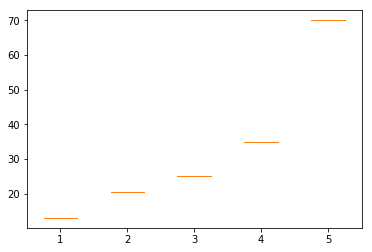

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
a = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]
df = pd.DataFrame(a)

print("mean: {}, median: {}".format(np.mean(a), np.median(a)))
print("Modality of data: {}".format(df.mode()))
print("Since there are two values, i.e., 25 & 35 it is bimodal data")

def midrange(x):
    return (np.max(x) + np.min(x))/2

print("Value of midrange is {}".format(midrange(df)))
print("Values of Q1, Median and Q3 are {}".format(np.percentile(df,[25, 50, 75])))
print("Five number summary:")
print("Minimum: {}, Q1: {}, Median: {}, Q3: {}, Maximum: {}".format(np.min(a), np.percentile(df,25), np.median(a), np.percentile(df,75), np.max(a)))
data = pd.DataFrame([np.min(a), np.percentile(df,25), np.median(a), np.percentile(df,75), np.max(a)])
plt.figure()
_ = plt.boxplot(data)



In [2]:
plt_differences = """
A quantile graph or plot is like a cumulative histogram.  
The Cumulative distribution function (CDF) is the same as the quantile graph for a function and is the term most often used by people working with statistics. 
A Q-Q or quantile-quantile graph is NOT a quantile graph, but people often get lazy and call it one since the data shown by a quantile graph is usually shown by graphing the CDF.
"""

print(plt_differences)


A quantile graph or plot is like a cumulative histogram.  
The Cumulative distribution function (CDF) is the same as the quantile graph for a function and is the term most often used by people working with statistics. 
A Q-Q or quantile-quantile graph is NOT a quantile graph, but people often get lazy and call it one since the data shown by a quantile graph is usually shown by graphing the CDF.



### 3. In practical data, tuples with missing values for some attributes are a common occurrence. Describe various methods for handling this problem (5%) .

#### Solutions


In [4]:
methods = '''

Imputation:
    Adding substitutional values where data is missing
Removing Data:
    Removing the data if there is no relation with the problem to be addressed or the presence affects the effiency of the model
'''
print(methods)



Imputation:
    Adding substitutional values where data is missing
Removing Data:
    Removing the data if there is no relation with the problem to be addressed or the presence affects the effiency of the model



## (30%) How to Acquire & Refine the Data


## Items, Users, Signal

- **Items**: Objects to be recommended
- **Users**: Target of the recommendation
- **Signal**: Explicit or Implicit feedback between Items and users

In our context
- Items are **stories** posted on HN
- Users are **users** commenting or posting stories
- Signal are **comments** on the stories by the user signalling interest

## Source of Data 

Lets see the sources for getting historical information posted on HackerNews

- **HackerNews API** - YCombinator provides an official hackernew api through Firebase. This is a near real-time database and provides both an *items* (stories and comments) as well as an *users* api.  It is available at https://github.com/HackerNews/API

- **BigQuery** : Google Big Query has a daily updated HackerNews public dataset available (from 2006 to date). It only has *items* information. It is available at https://bigquery.cloud.google.com/table/bigquery-public-data:hacker_news.full

## Items (Stories) 

The schema for the Big Query table is

| Field       | Type      | Description                           |
|:------------|----------:|:--------------------------------------|
| by          | STRING    | The username of the item's author.    |
| score       | INTEGER   | Story score                           |
| time        | INTEGER   | Unix time                             |
| timestamp   | TIMESTAMP | Timestamp for the unix time           |
| title       | STRING    | Story title                           |
| type        | STRING    | Type of details (comment, story, ...) |
| url         | STRING    | Story url                             |
| text        | STRING    | Story or comment text                 |
| parent      | INTEGER   | Parent comment ID                     |
| deleted     | BOOLEAN   | Is deleted?                           |
| dead        | BOOLEAN   | Is dead?                              |
| descendants | INTEGER   | Number of story or poll descendants   |
| id          | INTEGER   | The item's unique id.                 |
| ranking     | INTEGER   | Comment ranking                       |


- Get all the stories posted on HackerNews in **2017 (till date)**. 
- To ensure a relevant set, we will limit the stories which have atleast have **score of 5 points or more** on them. 

This dataset is available in `stories2017score5.gzip`

### Could you read file stories2017score5.csv.gzip by Python pandas package and plot histogram of scores(10%) 

#### Solutions

Index(['by', 'score', 'time', 'timestamp', 'title', 'type', 'url', 'text',
       'parent', 'deleted', 'dead', 'descendants', 'id', 'ranking'],
      dtype='object')


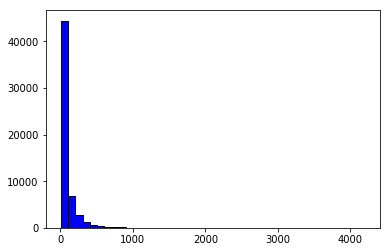

In [2]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("stories2017score5.csv")
print(df.columns)
df.fillna(-999999)
interval = 100
data = df['score']
plt.hist(data, color = 'blue', edgecolor = 'black', bins = range(int(min(data)), int(max(data)) + interval, interval))
plt.show()

### Most Popular Stories (5%)

For this exercise:
- Let us choose the most popular stories with a score > 500 over the last year
- Lets keep the columns - user (by), userId (id), score (score), title (title)


#### Solutions

In [23]:
selec_high_scores = df.loc[df['score'] > 500][['by', 'id', 'score', 'title']]
print(selec_high_scores)

                   by        id  score  \
1908          appoets  14274033    503   
15284       djyaz1200  14107522    547   
15291   SimplyUseless  13647190    671   
15296       kungfudoi  13309610    511   
15297     dantiberian  13860890   1089   
15298     NelsonMinar  13747414   2168   
20439          lainon  15089476    793   
20441         songzme  14723308    837   
20442         rsc-dev  13650818    861   
20443          elsyms  15147660    869   
23475        dgritsko  13382263    533   
23476       imartin2k  15694430    795   
23479      sohkamyung  15546536    866   
23480       throw9982  14136081   1124   
23483           nerdy  14357881    629   
25532       kungfudoi  13844389    663   
25536        oscarwao  13775667   1246   
27049   olivercameron  14790251    794   
27051      mathgenius  14338411    620   
27054          lisper  15827369    740   
28384        vthallam  13514802    514   
28391        molecule  14189392    655   
28396        benbreen  15857833   

###  Item (Story) - User - Signal (Comment) Lets get all the comments from the database by reviewing fifle (bycomments2017score5.csv.gz) and keep only the user and story information. Please see what problems in data and dealing with them. Show me processed data shapes (how many rows and column) and first five rows of  processed data (5%).




#### Solutions

In [16]:
import pandas as pd

df = pd.read_csv('bycomments2017score5.csv')
print("No of rows and columns in data: {}".format(df.shape))
print("Column headers in data: {}".format(df.columns))
print("No of samples with null data: {}".format(df[df.columns[df.isnull().any()]].isnull().sum()))
print("First five rows of data: {}".format(df.head(5)))

No of rows and columns in data: (450884, 2)
Column headers in data: Index(['by', 'parent'], dtype='object')
No of samples with null data: by    14537
dtype: int64
First five rows of data:     by    parent
0  NaN  15332819
1  NaN  15361981
2  NaN  13939068
3  NaN  15773920
4  NaN  15824599


### Users information (10%). 

We need to get the details for all the users that have made comments in our list of stories.

Also, we are interested in their details
- How long have they been on the HN platform? (Created)
- How active they are? (# of comments)?
- How good they are to the HN community (karma)?

We will need to get the User Information from HN

- **Hacker News API**: Official API hosted on Firebase - https://github.com/HackerNews/API
- **Haxor**: Unofficial HN Python API c- https://github.com/avinassh/haxor
- **Ascynio-HN**: A very fast async Python API for HackerNews - https://github.com/itielshwartz/asyncio-hn

### Think how you use API to get all uses data information. Download them and save them. Will be used later.

#### Solutions

In [36]:
import json
import requests
import pandas as pd

def get_info(api_url, headers = None):

    response = requests.get(api_url, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

In [44]:
json_data = get_info('https://hacker-news.firebaseio.com/v0/user/jl.json?print=pretty')
df = pd.concat([pd.DataFrame(v) for k,v in json_data.items()], keys=json_data)
print (df)

ValueError: DataFrame constructor not properly called!

## (30%) Feature Engineering (Data Transform)

How do we create the user-item matrix for the HackerNews Dataset
- OneHot Encoding
- Sparse Matrix (for scalability)

### What is OneHot Encoding and its purpose (5%). Could you apply OneHot to encode previous obtained story user comment data from bycomments2017score5.csv.gz ? Show encoded data previous few rows. (10%)

#### Solutions:



### Could you what is Coordinate list (COO) compression format for sparse matrix generation (5%)
### Implment this to compress previous obtained story user comment data from bycomments2017score5.csv.gz (10%).

#### Solutions

